In [2]:
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### TASKS REQUIRED:
- Read data
- Extract data
- Draw graphs
- Transform data

# 1) READ DATA

In [4]:
df = pd.read_csv('bank.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42.0,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56.0,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60.0,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37.0,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28.0,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


## check & clean null data

In [5]:
print(df.shape)
df.isna().sum()

(11162, 17)


age          12
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [6]:
df = df.dropna()
print(df.shape)

(11150, 17)


## Knowing variables

In [7]:
names = df.columns.values.tolist()
print(len(names))
print(names)

types = df.dtypes
types

17
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

# 2) Extract data & Draw graphs

In [8]:
#1áy thông tin theo cột
x = df['age'][2]
print (x)
# lây cå cột
col = list (df [ 'age'])
print (len(col))
print (col[:10])
# láy nhiéu cột theo khoáng
cols = df.loc[1:3,['age', 'job']]
print (cols)
# láy nhiều cột theo diều kiện
cols = df.loc[df['age']>50,[ 'age' ,'job']]
print (cols)

41.0
11150
[59.0, 56.0, 41.0, 55.0, 54.0, 42.0, 56.0, 60.0, 37.0, 28.0]
    age         job
1  56.0      admin.
2  41.0  technician
3  55.0    services
        age         job
0      59.0      admin.
1      56.0      admin.
3      55.0    services
4      54.0      admin.
6      56.0  management
...     ...         ...
11140  55.0    services
11142  52.0      admin.
11144  60.0     retired
11145  60.0     retired
11154  52.0  technician

[2471 rows x 2 columns]


## What are customers' mariage?

married     6347
single      3513
divorced    1290
Name: marital, dtype: int64


<AxesSubplot: >

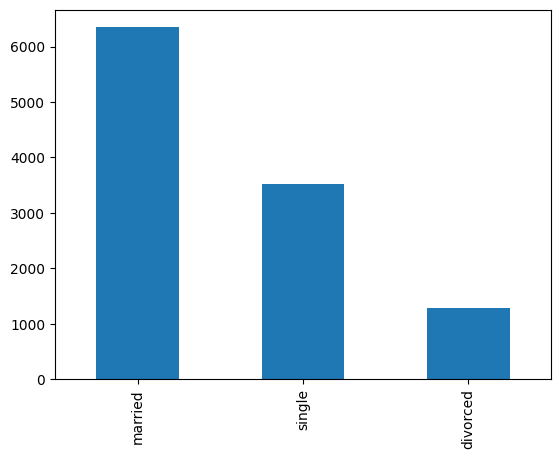

In [14]:
f = df[ 'marital' ] .value_counts ()
print(f)
f.plot.bar()

## What are their jobs?

management       2563
blue-collar      1941
technician       1822
admin.           1330
services          922
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


<AxesSubplot: >

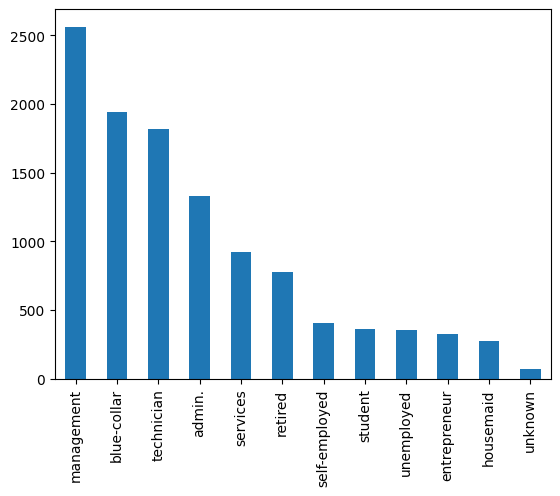

In [15]:
f = df[ 'job' ] .value_counts ()
print(f)
f.plot.bar()

## What are their education status?

secondary    5470
tertiary     3684
primary      1499
unknown       497
Name: education, dtype: int64


secondary    5470
tertiary     3684
primary      1499
unknown       497
Name: education, dtype: int64

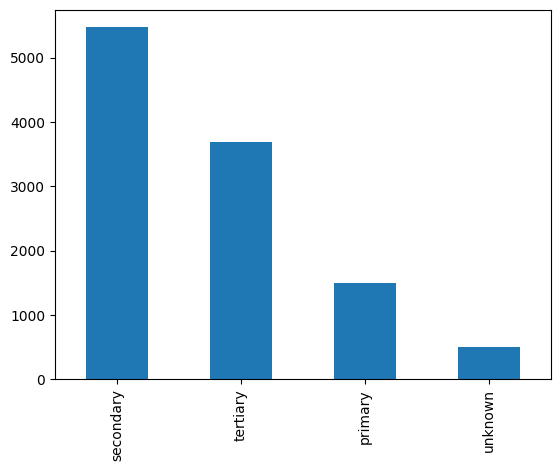

In [13]:
f = df[ 'education' ] .value_counts ()
print(f)
f.plot.bar()

## How many of them have loan?

no     9692
yes    1458
Name: loan, dtype: int64


<AxesSubplot: >

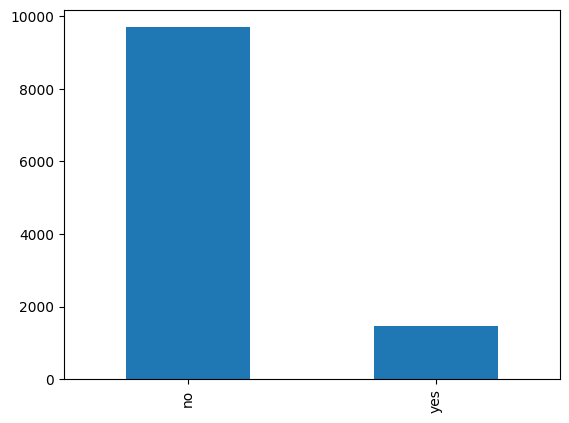

In [20]:
f = df[ 'loan' ] .value_counts ()
print(f)
f.plot.bar()

## Distribution of customers’ balance?

### Average balance based on their jobs

              job      balance
0          admin.  1198.630075
1     blue-collar  1205.076249
2    entrepreneur  1621.942073
3       housemaid  1366.160584
4      management  1793.381974
5         retired  2417.250643
6   self-employed  1865.372840
7        services  1082.352495
8         student  1500.783333
9      technician  1556.762898
10     unemployed  1314.719888
11        unknown  1945.457143


<AxesSubplot: xlabel='balance', ylabel='job'>

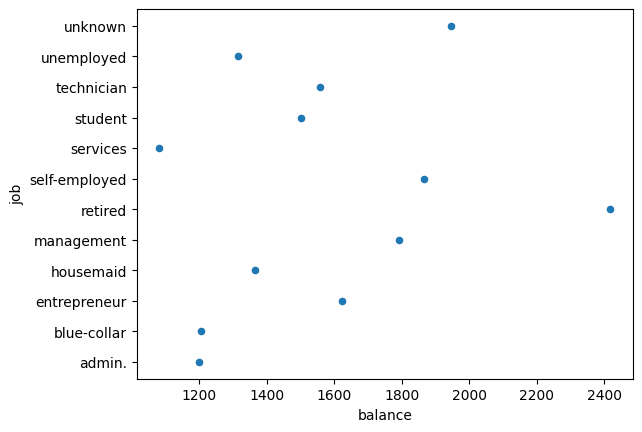

In [32]:
f = df.groupby('job', as_index=False)['balance'].mean()
print(f)
f.plot.scatter(y='job',x='balance')

### Statistic of variables

In [43]:
mean = df.groupby('job', as_index=False)['balance'].mean()
max = df.groupby('job', as_index=False)['balance'].max()
min = df.groupby('job', as_index=False)['balance'].min()
statistic = max.merge(min, on='job',suffixes=['max','min']).merge(mean, on='job')

In [52]:
statistic.rename(columns={'balancemax':'max','balancemin':'min','balance':'mean'}, inplace=True)
statistic

,job,max,min,mean
0,admin.,56831,-1415,1198.630075
1,blue-collar,66653,-1489,1205.076249
2,entrepreneur,51439,-1965,1621.942073
3,housemaid,26965,-1531,1366.160584
4,management,36252,-6847,1793.381974
5,retired,81204,-1206,2417.250643
6,self-employed,52587,-3058,1865.372840
7,services,23592,-1139,1082.352495
8,student,23878,0,1500.783333
9,technician,45248,-1944,1556.762898


<AxesSubplot: xlabel='job'>

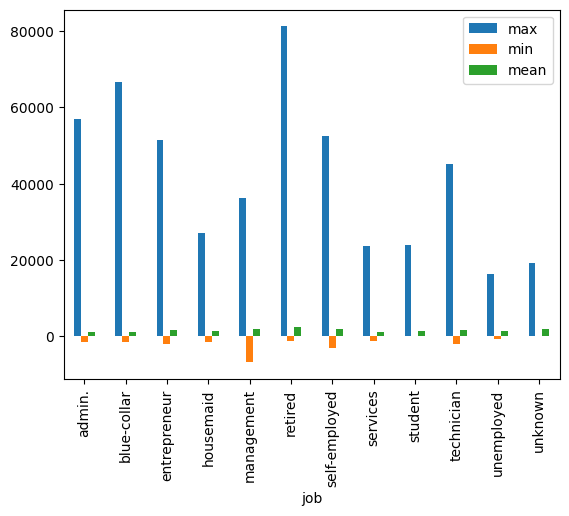

In [62]:
statistic.plot.bar(x='job',stacked=0 )

### Does the "minus balance" mean "loan" ?

<AxesSubplot: >

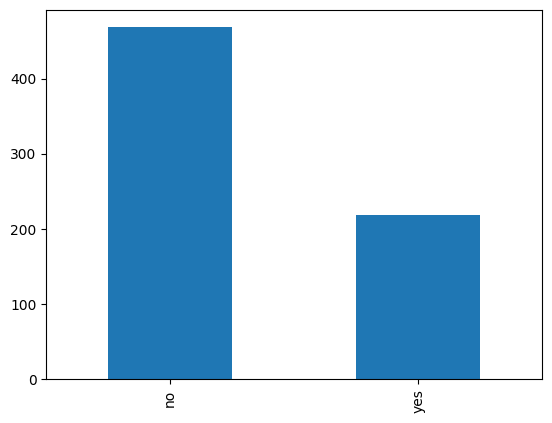

In [65]:
minus_and_loan = df.loc[df['balance'] < 0][['balance', 'loan']]
f = minus_and_loan['loan'].value_counts()
f.plot.bar()

# 4) Transform data